In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('cleaned_dataset.csv')

# Insights

In [3]:
related_questions = {
    "Perceived Ease of Use": ["Q13", "Q14", "Q15", "Q16", "Q17", "Q18", "Q19", "Q20", "Q21", "Q22"],
    "Perceived Usefulness": ["Q23", "Q24", "Q25", "Q26", "Q27", "Q28", "Q29", "Q30", "Q31", "Q32"],
    "Structural Assurance": ["Q33", "Q34", "Q35", "Q36", "Q37", "Q38"],
    "Social Influence (SI)": ["Q39", "Q40", "Q41", "Q42", "Q43", "Q44", "Q45", "Q46", "Q47", "Q48", "Q49", "Q50"],
    "Ease of Navigation": ["Q13", "Q14"],
    "Learn Curve": ["Q15", "Q16"],
    "Clarity of Instructions": ["Q17", "Q18"],
    "Response Time": ["Q19", "Q20"],
    "Error Handling": ["Q21", "Q22"],
    "Product Availability": ["Q23", "Q24"],
    "Convenience": ["Q25", "Q26"],
    "Cost-effectiveness": ["Q27", "Q28"],
    "Information Accessibility": ["Q29", "Q30"],
    "Personalization": ["Q31", "Q32"],
    "Privacy Protection": ["Q33", "Q34"],
    "Payment Security": ["Q35", "Q36"],
    "Transparent Policies": ["Q37", "Q38"],
    "Word of Mouth and Recommendations": ["Q39", "Q40"],
    "Social Media Posts/ Influence": ["Q41", "Q42"],
    "Online Reviews and Ratings": ["Q43", "Q44"],
    "Social Proof": ["Q45", "Q46"],
    "Normative Pressure": ["Q47", "Q48"],
    "Information Sharing": ["Q49", "Q50"],
    "Attitude": ["Q51", "Q52"],
    "Perceived Risk": ["Q53", "Q54"],
    "Intention to Purchase Online": ["Q56", "Q57", "Q58", "Q59"]
}

Cronbatch’s alpha coefficient value

In [4]:
import pingouin as pg

alpha_values = {}

for index, val in enumerate(related_questions):
    temp = df.loc[:, related_questions[val]]
    alpha = pg.cronbach_alpha(data=temp)
    alpha_values[val] = float(round(alpha[0], 4))

ca_df = pd.DataFrame(pd.Series(alpha_values))
ca_df.reset_index(inplace=True)
ca_df.columns = ['variable', 'c_alpha']
ca_df

,variable,c_alpha
0,Perceived Ease of Use,0.8947
1,Perceived Usefulness,0.8974
2,Structural Assurance,0.8993
3,Social Influence (SI),0.9084
4,Ease of Navigation,0.8795
5,Learn Curve,0.8230
6,Clarity of Instructions,0.8482
7,Response Time,0.7055
8,Error Handling,0.7116
9,Product Availability,0.8103


### Rule of Thumb for Cronbach's Alpha

| Alpha (α) Value | Interpretation                                         |
|------------------|-------------------------------------------------------|
| ≥ 0.9            | Excellent (might be too high; may suggest redundancy) |
| 0.8 – 0.9        | Good                                                  |
| 0.7 – 0.8        | Acceptable                                            |
| 0.6 – 0.7        | Questionable                                          |
| 0.5 – 0.6        | Poor                                                  |
| < 0.5            | Unacceptable                                          |


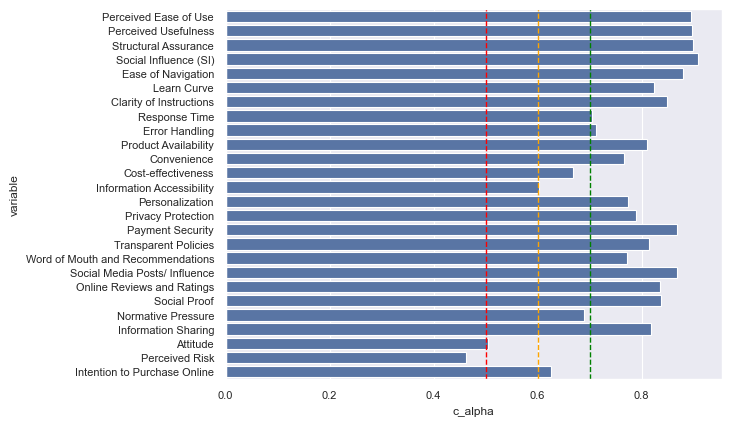

In [5]:
sns.set_context("paper", font_scale=0.9)
sns.barplot(x='c_alpha', y='variable', data=ca_df)
plt.axvline(x=0.7, color='green', linestyle='--', linewidth=1)
plt.axvline(x=0.6, color='orange', linestyle='--', linewidth=1)
plt.axvline(x=0.5, color='red', linestyle='--', linewidth=1)

Inter-item correlation

In [6]:
# df_backup_1 = df.copy()

# for index, key in enumerate(related_questions):
#     df[key] = df[related_questions[key]].mean(axis=1).round(2)
#     df = df.drop(columns=related_questions[key])

# df.head()

In [7]:
# fig = plt.figure(figsize=(10, 40))
# correlation_matrixes = {}

# for index, key in enumerate(related_questions):
#     data_peu = df_backup_1[related_questions[key]]
#     correlation_matrix = data_peu.corr()
#     correlation_matrixes[key] = correlation_matrix

#     ax=fig.add_subplot(4, 1, index+1)
#     sns.heatmap(correlation_matrix, annot=True, axes=ax, cmap='coolwarm', fmt='.2f', linewidths=0.5)
#     ax.set_title(key)

# plt.show()